In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from matplotlib import rcParams

rcParams['font.family'] = 'simhei'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [2]:
import matplotlib
matplotlib.matplotlib_fname()

'/home2/hky/miniconda3/envs/d2l/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'

In [3]:
precision = dict()
Energy_min = np.logspace(1, 2.6, 9)
Energy_max = np.logspace(1.2, 2.8, 9)
bins_1 = np.linspace(-2, 2, 41)
bins_2 = np.linspace(1, 2.8, 10)
bins_2_center = (bins_2[:-1] + bins_2[1:]) / 2


def check_fit(energy_pred, energy_orgin, title):
    plt.tight_layout()
    fig, axes = plt.subplots(3, 3, sharey=True, figsize=(9, 9))
    precision_ = list()
    axes = axes.reshape(-1)
    for i in range(9):
        need = np.where((Energy_min[i] < energy_pred)
                        & (Energy_max[i] > energy_pred))
        need_draw = np.log(energy_pred[need]/energy_orgin[need])
        precision_.append(np.std(need_draw))
        axes[i].hist(need_draw, bins=bins_1, density=True)
        axes[i].set_title(
            f"{Energy_min[i]:.2f}<E_pred<{Energy_max[i]:.2f}", fontsize=10)
        axes[i].set_ylim(0, 4)
        axes[i].text(-2, 3,
                     f"std={np.std(need_draw):.2f}\nmean={np.mean(need_draw):.2f}\n")
    plt.xlabel("ln(pred/true)")
    plt.show()

    hist_orgin, _ = np.histogram(np.log10(energy_orgin), bins=bins_2)
    hist_recon, _ = np.histogram(np.log10(energy_pred), bins=bins_2)

    plt.errorbar(
        bins_2_center,
        hist_orgin,
        np.sqrt(hist_orgin),
        np.ones(9) * 0.1,
        fmt=".",
        label="true Energy"
    )
    plt.errorbar(
        bins_2_center,
        hist_recon,
        np.sqrt(hist_recon),
        np.ones(9) * 0.1,
        fmt=".",
        label="pred Energy"
    )
    plt.title(title)
    plt.xlabel("log10energy")
    plt.ylabel("dN")
    plt.legend()
    plt.yscale("log")
    plt.show()
    precision[title] = precision_


In [4]:
data = np.load("/home2/hky/github/Gamma_Energy/MCdata/CrabMCData.npz")


In [5]:
nch = data["nch"]
theta = data["theta"]
phi = data["phi"]
sigma = data["sigma"]
cx = data["cx"]
cy = data["cy"]
sumpf = data["sumpf"]
summd = data["summd"]
mr1 = data["mr1"]
ne = data["ne"]
age = data["age"]
pritheta = data["pritheta"]
priphi = data["priphi"]
prie = data["prie"]
inout = data["inout"]
S50 = data["S50"]


In [6]:
cuted = np.where((theta < 40) & (nch >= 16) & (inout == 1) & (np.log10(
    S50) > -1.2) & (age > 0.31) & (age < 1.3) & ((summd < 2.1e-3*sumpf**1.2) | (summd < 0.4)))


/tmp/ipykernel_133585/4164650791.py:1: RuntimeWarning: divide by zero encountered in log10
  cuted = np.where((theta < 40) & (nch >= 16) & (inout == 1) & (np.log10(


In [7]:
nch = nch[cuted]
theta = theta[cuted]
phi = phi[cuted]
sigma = sigma[cuted]
cx = cx[cuted]
cy = cy[cuted]
sumpf = sumpf[cuted]
summd = summd[cuted]
mr1 = mr1[cuted]
ne = ne[cuted]
age = age[cuted]
pritheta = pritheta[cuted]
priphi = priphi[cuted]
prie = prie[cuted]/1000
inout = inout[cuted]
S50 = S50[cuted]
sectheta = 1/np.cos(np.deg2rad(theta))


In [8]:
train_index, test_index = train_test_split(
    range(nch.shape[0]), test_size=0.4, shuffle=True, random_state=42)


In [9]:
nch_train = nch[train_index]
theta_train = theta[train_index]
phi_train = phi[train_index]
sigma_train = sigma[train_index]
cx_train = cx[train_index]
cy_train = cy[train_index]
sumpf_train = sumpf[train_index]
summd_train = summd[train_index]
mr1_train = mr1[train_index]
ne_train = ne[train_index]
age_train = age[train_index]
pritheta_train = pritheta[train_index]
priphi_train = priphi[train_index]
prie_train = prie[train_index]
inout_train = inout[train_index]
S50_train = S50[train_index]
sectheta_train = sectheta[train_index]

nch_test = nch[test_index]
theta_test = theta[test_index]
phi_test = phi[test_index]
sigma_test = sigma[test_index]
cx_test = cx[test_index]
cy_test = cy[test_index]
sumpf_test = sumpf[test_index]
summd_test = summd[test_index]
mr1_test = mr1[test_index]
ne_test = ne[test_index]
age_test = age[test_index]
pritheta_test = pritheta[test_index]
priphi_test = priphi[test_index]
prie_test = prie[test_index]
inout_test = inout[test_index]
S50_test = S50[test_index]
sectheta_test = sectheta[test_index]


# 线性回归

Epoch 1000, loss: 0.0291
Epoch 2000, loss: 0.0270
Epoch 3000, loss: 0.0269
Epoch 4000, loss: 0.0269
Epoch 5000, loss: 0.0269
Epoch 6000, loss: 0.0269


/home2/hky/miniconda3/envs/d2l/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


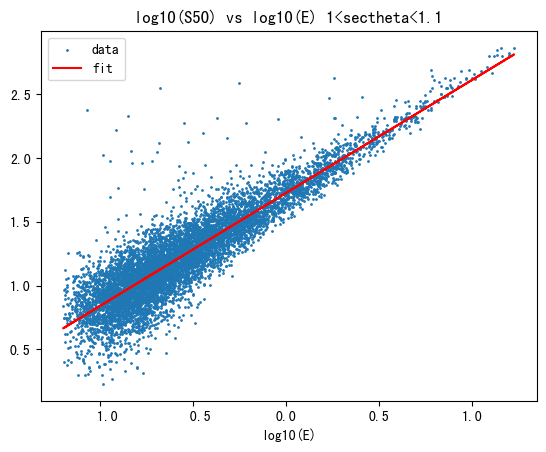

Epoch 1000, loss: 0.0398
Epoch 2000, loss: 0.0373
Epoch 3000, loss: 0.0373
Epoch 4000, loss: 0.0373
Epoch 5000, loss: 0.0373
Epoch 6000, loss: 0.0373


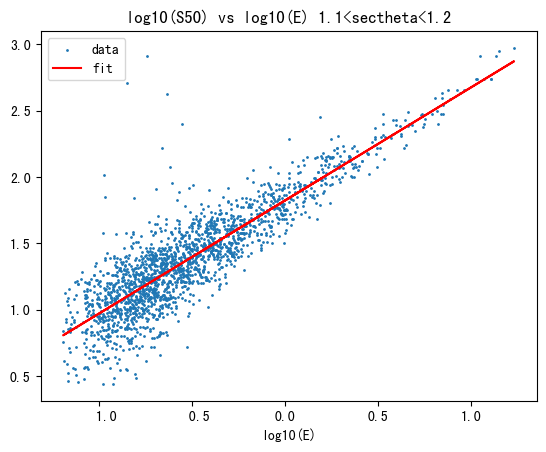

Epoch 1000, loss: 0.0482
Epoch 2000, loss: 0.0478
Epoch 3000, loss: 0.0478
Epoch 4000, loss: 0.0478
Epoch 5000, loss: 0.0478
Epoch 6000, loss: 0.0478


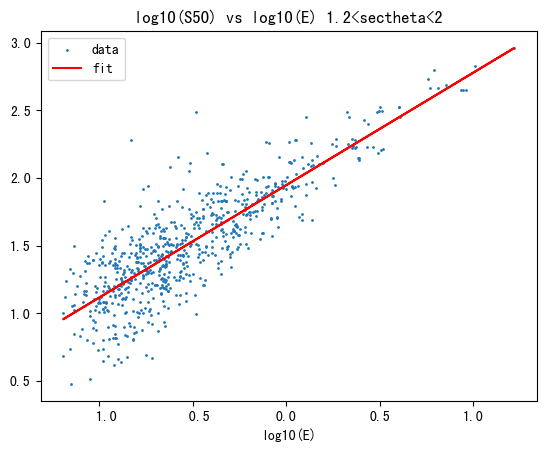

In [10]:
sectheta_min = [1, 1.1, 1.2]
sectheta_max = [1.1, 1.2, 2]
energy_pred = list()
energy_orgin = list()
for i in range(3):
    tmpcut = np.where((sectheta_train > sectheta_min[i]) & (
        sectheta_train < sectheta_max[i]))

    # 导入特征
    x = np.log10(S50_train[tmpcut])
    y = np.log10(prie_train[tmpcut])

    # 转换为 tensor
    x = torch.from_numpy(x.reshape(-1, 1)).float()
    y = torch.from_numpy(y.reshape(-1, 1)).float()

    # 定义模型
    model = torch.nn.Linear(1, 1)

    # 定义损失函数
    loss_fn = torch.nn.MSELoss()

    # 定义优化器
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

   # 训练模型
    num_epochs = 6000  # 迭代次数
    for epoch in range(num_epochs):
        # 前向传播
        y_pred = model(x)
        # 计算损失
        loss = loss_fn(y_pred, y)
        # 反向传播和更新参数
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 打印信息
        if (epoch + 1) % 1000 == 0:
            print(f"Epoch {epoch+1}, loss: {loss.item():.4f}")


    plt.scatter(x.numpy(), y.detach().numpy(), label="data", s=1)
    plt.plot(x.numpy(), y_pred.detach().numpy(), color="red", label="fit")
    plt.xlabel("log10(S50)")
    plt.xlabel("log10(E)")
    plt.title("log10(S50) vs log10(E) " +
              f"{sectheta_min[i]}<sectheta<{sectheta_max[i]}")
    plt.legend()
    plt.show()

    tmpcut_test = np.where((sectheta_test > sectheta_min[i]) & (
        sectheta_test < sectheta_max[i]))
    x_test = np.log10(S50_test[tmpcut_test])
    y_test = np.log10(prie_test[tmpcut_test])
    x_test = torch.from_numpy(x_test.reshape(-1, 1)).float()
    y_test = torch.from_numpy(y_test.reshape(-1, 1)).float()

    y_pred = model(x_test)
    energy_pred.append(y_pred.detach().numpy())
    energy_orgin.append(y_test.detach().numpy())

energy_orgin = 10**np.concatenate(energy_orgin)
energy_pred = 10**np.concatenate(energy_pred)


<Figure size 640x480 with 0 Axes>

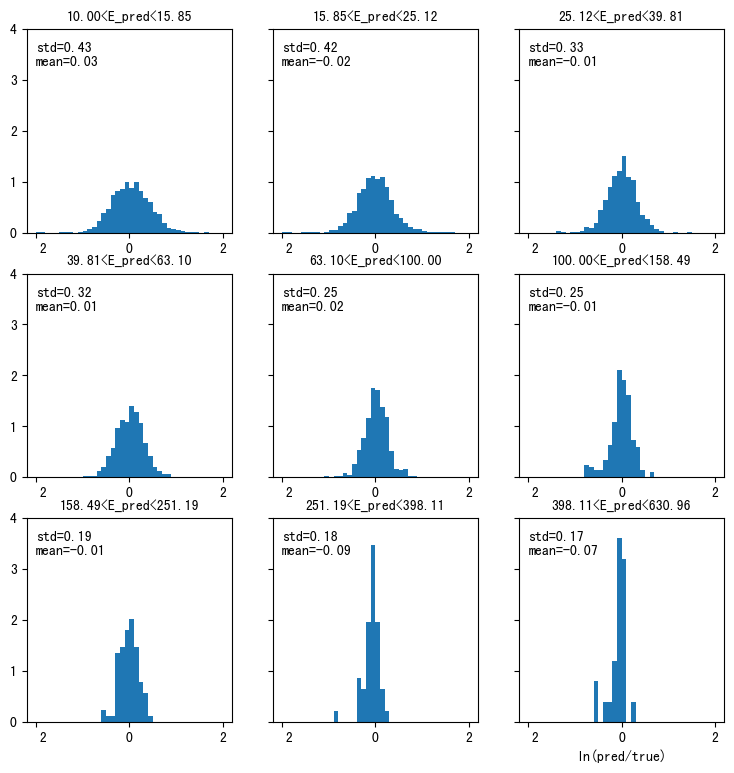

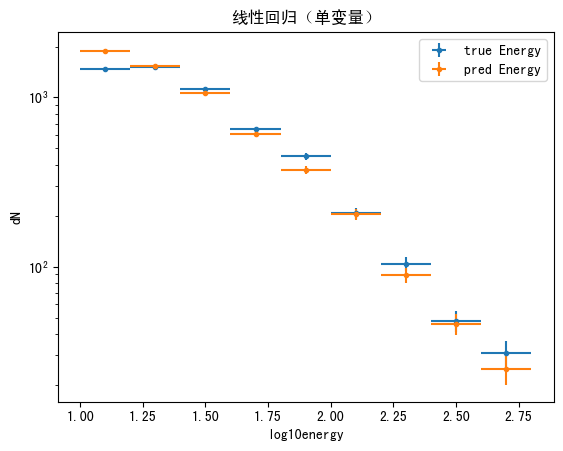

In [11]:
check_fit(energy_pred, energy_orgin, "线性回归（单变量）")

In [12]:
energy_pred = list()
energy_orgin = list()

# 导入特征
x = np.array([np.log10(S50), sectheta]).T
y = np.log10(prie)

# 转换为 tensor
x = torch.from_numpy(x).float()
y = torch.from_numpy(y.reshape(-1, 1)).float()

# 定义模型
model = torch.nn.Linear(2, 1)

# 定义损失函数
loss_fn = torch.nn.MSELoss()

# 定义优化器
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 6000  # 迭代次数
for epoch in range(num_epochs):
    # 前向传播
    y_pred = model(x)
    # 计算损失
    loss = loss_fn(y_pred, y)
    # 反向传播和更新参数
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 打印信息
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1}, loss: {loss.item():.4f}")

energy_pred.append(y_pred.detach().numpy())
energy_orgin.append(y.detach().numpy())
# plt.scatter(x.numpy(),y.detach().numpy(), label="data",s=1)
# plt.plot(x.numpy(), y_pred.detach().numpy(), color="red", label="fit")
# plt.xlabel("S50(power transform)")
# plt.xlabel("E(power transform)")
# plt.title("S50 vs E "+f"{sectheta_min[i]}<sectheta<{sectheta_max[i]}")
# plt.legend()
# plt.show()
energy_orgin = 10**np.concatenate(energy_orgin)
energy_pred = 10**np.concatenate(energy_pred)


Epoch 1000, loss: 0.0307
Epoch 2000, loss: 0.0290
Epoch 3000, loss: 0.0290
Epoch 4000, loss: 0.0290
Epoch 5000, loss: 0.0290
Epoch 6000, loss: 0.0290


<Figure size 640x480 with 0 Axes>

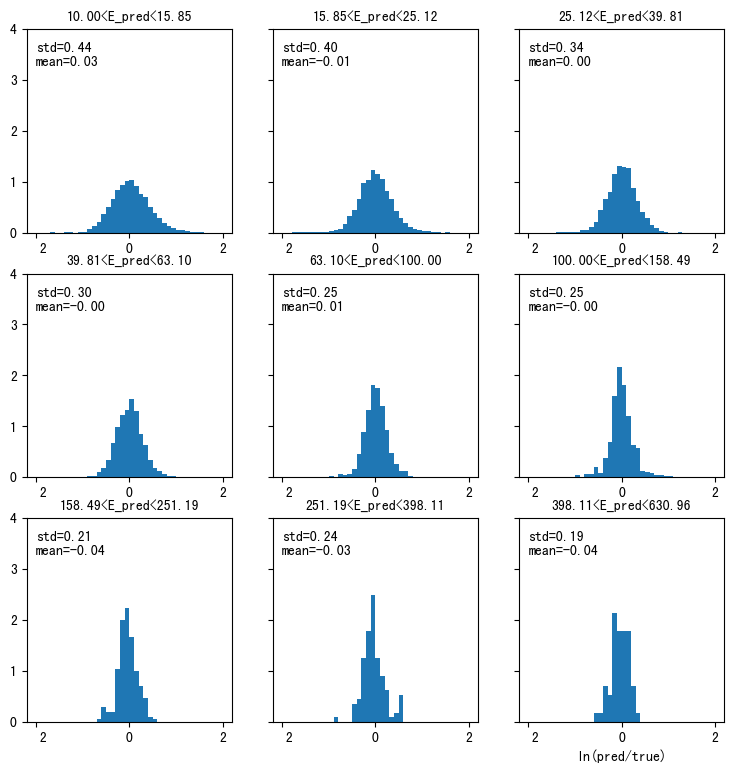

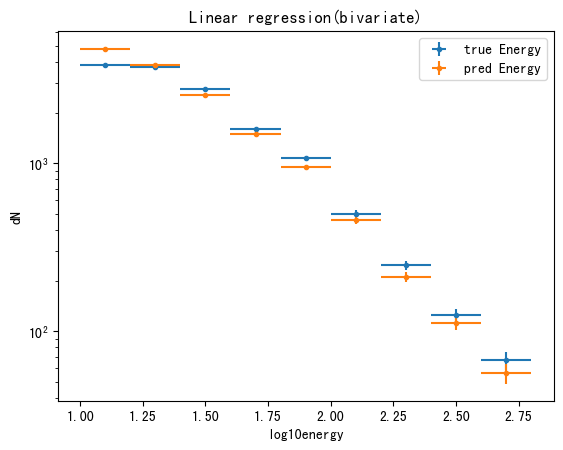

In [13]:
check_fit(energy_pred, energy_orgin, "Linear regression(bivariate)")


# 多项式回归